In [10]:
from statsmodels.tsa.arima.model import ARIMA

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import root_mean_squared_error
from ipywidgets import widgets

In [4]:
df = pd.read_csv('../Datasets/FRED-NROUST.csv')
y_train = df['Value'].iloc[:-8]
y_test = df['Value'].iloc[-8:]


In [6]:
model = ARIMA(y_train, order=(1, 1, 1))
model_fit = model.fit()
print('coefs : %s' % model_fit.params)
predictions = model_fit.predict(start=len(y_train), end = len(y_train) + len(y_test) - 1, dynamic=False)


coefs : ar.L1     0.934649
ma.L1    -0.152856
sigma2    0.000131
dtype: float64


Text(0.5, 0.98, 'RMSE: 0.006, p = 1, d = 1, q = 1 ')

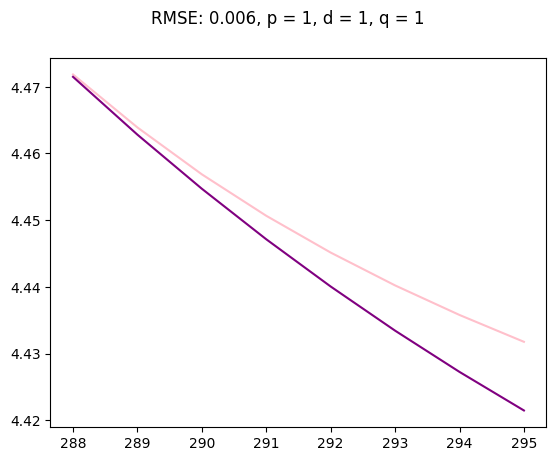

In [9]:
y_test.plot(color='pink', label='Test')
predictions.plot(color='purple', label='Forecast')
rmse = root_mean_squared_error(y_test, predictions)
plt.suptitle(f'RMSE: {rmse:.3f}, p = {1}, d = {1}, q = {1} ')

In [14]:
def arima_widget(p, d, q):
    model = ARIMA(y_train, order=(p, d, q))
    model_fit = model.fit()
    predictions = model_fit.predict(start=len(y_train), end = len(y_train) + len(y_test) - 1, dynamic=False)


    y_test.plot(color='pink', label='Test')
    predictions.plot(color='purple', label='Forecast')
    rmse = root_mean_squared_error(y_test, predictions)
    plt.suptitle(f'RMSE: {rmse:.5f}, p = {p}, d = {d}, q = {q} ')
    plt.show()


widgets.interact(arima_widget, p=(1, 5, 1), d=(1, 5, 1), q=(1, 5, 1))

interactive(children=(IntSlider(value=3, description='p', max=5, min=1), IntSlider(value=3, description='d', m…

<function __main__.arima_widget(p, d, q)>

tu beer hai

In [ ]:
df = pd.read_csv('../Datasets/monthly-beer-production-in-austr.csv')
y_train = df['Monthly beer production'].iloc[:-12]
y_test = df['Monthly beer production'].iloc[-12:]



def arima_widget(p, d, q):
    model = ARIMA(y_train, order=(p, d, q))
    model_fit = model.fit()
    predictions = model_fit.predict(start=len(y_train), end = len(y_train) + len(y_test) - 1, dynamic=False)


    y_test.plot(color='pink', label='Test')
    predictions.plot(color='purple', label='Forecast')
    rmse = root_mean_squared_error(y_test, predictions)
    plt.suptitle(f'RMSE: {rmse:.5f}, p = {p}, d = {d}, q = {q} ')
    plt.show()


widgets.interact(arima_widget, p=(1, 5, 1), d=(1, 5, 1), q=(1, 5, 1))




interactive(children=(IntSlider(value=3, description='p', max=5, min=1), IntSlider(value=3, description='d', m…

<function __main__.arima_widget(p, d, q)>

# AUTOARIMA


In [16]:
# DO ON GOOGLE COLLAB